In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
matches = pd.read_csv("C:/Users/ADMIN/Downloads/cricketprediction/matches.csv")
deliveries = pd.read_csv("C:/Users/ADMIN/Downloads/cricketprediction/deliveries.csv")

print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)


Matches shape: (756, 18)
Deliveries shape: (179078, 21)


In [4]:
# Check column names and data types
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
# Preview data
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [10]:
# Missing values in matches
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [11]:
# Missing values in deliveries
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [12]:
matches['city'] = matches['city'].fillna('Unknown')
matches['venue'] = matches['venue'].fillna('Unknown')
matches = matches.dropna(subset=['winner'])
matches['win_by_runs'] = matches['win_by_runs'].fillna(0)
matches['win_by_wickets'] = matches['win_by_wickets'].fillna(0)
print("Matches cleaned successfully")

Matches cleaned successfully


In [13]:
deliveries = deliveries.fillna(0)
print("Deliveries cleaned successfully")

Deliveries cleaned successfully


In [14]:
print("Matches nulls:")
print(matches.isnull().sum())

print("\nDeliveries nulls:")
print(deliveries.isnull().sum())

Matches nulls:
id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            634
dtype: int64

Deliveries nulls:
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [15]:
matches.columns = matches.columns.str.lower().str.replace(" ", "_")
deliveries.columns = deliveries.columns.str.lower().str.replace(" ", "_")

print("Column names standardized")

Column names standardized


In [16]:
matches['date'] = pd.to_datetime(matches['date'], errors='coerce')

In [17]:
matches = matches.rename(columns={'id': 'match_id'})

In [18]:
ipl_data = deliveries.merge(matches, on='match_id', how='left')
print("Merged dataset shape:", ipl_data.shape)

Merged dataset shape: (179078, 38)


In [19]:
# Separate numeric and categorical columns
num_cols = matches.select_dtypes(include=['int64', 'float64']).columns
obj_cols = matches.select_dtypes(include=['object']).columns
print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(obj_cols))

Numeric columns: ['match_id', 'season', 'dl_applied', 'win_by_runs', 'win_by_wickets']
Categorical columns: ['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']


In [20]:
# Fill numeric columns with 0
matches[num_cols] = matches[num_cols].fillna(0)
# Fill categorical columns with 'Unknown'
matches[obj_cols] = matches[obj_cols].fillna('Unknown')
print("Missing values handled safely ")

Missing values handled safely 


In [21]:
# Verify no missing values remain
print(matches.isnull().sum())

match_id             0
season               0
city                 0
date               470
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              0
umpire2              0
umpire3              0
dtype: int64


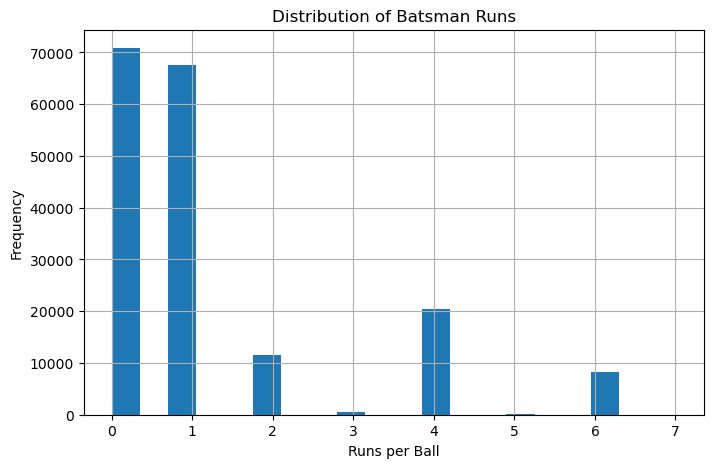

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
ipl_data['batsman_runs'].hist(bins=20)
plt.title("Distribution of Batsman Runs")
plt.xlabel("Runs per Ball")
plt.ylabel("Frequency")
plt.show()

In [25]:
ipl_data['is_wicket'] = ipl_data['player_dismissed'].apply(
    lambda x: 0 if x == 0 else 1
)

In [26]:
print("Wicket Distribution:")
print(ipl_data['is_wicket'].value_counts())

Wicket Distribution:
is_wicket
0    170244
1      8834
Name: count, dtype: int64


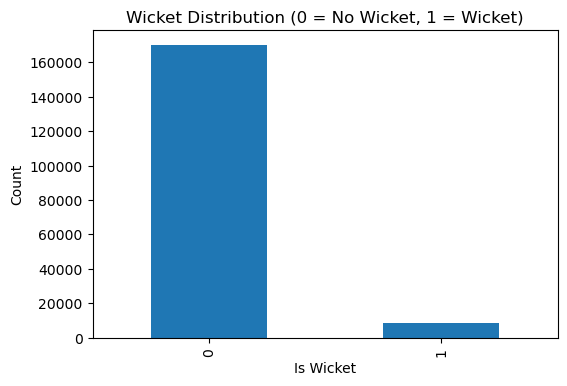

In [27]:
plt.figure(figsize=(6,4))
ipl_data['is_wicket'].value_counts().plot(kind='bar')
plt.title("Wicket Distribution (0 = No Wicket, 1 = Wicket)")
plt.xlabel("Is Wicket")
plt.ylabel("Count")
plt.show()

In [22]:
venue_avg_runs = (
    ipl_data
    .groupby('venue')['batsman_runs']
    .mean()
    .sort_values(ascending=False)
)


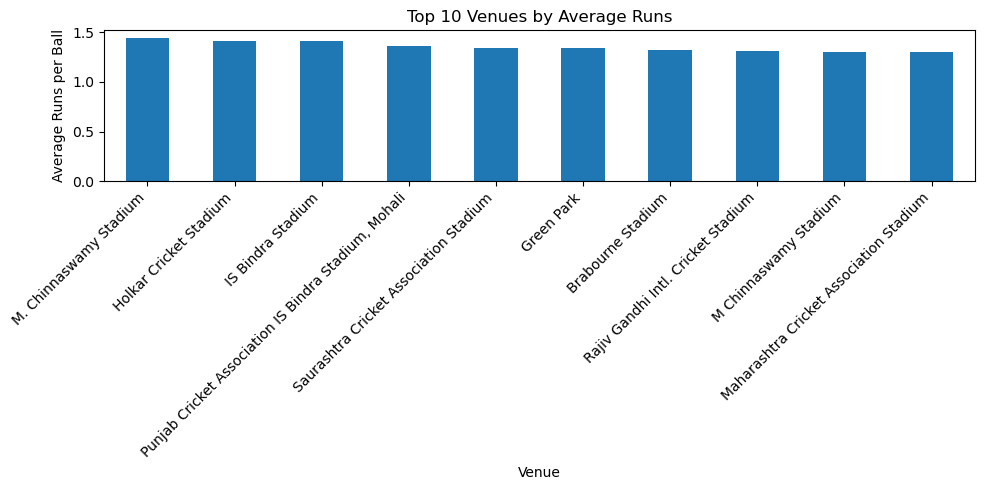

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
venue_avg_runs.head(10).plot(kind='bar')
plt.title("Top 10 Venues by Average Runs")
plt.xlabel("Venue")
plt.ylabel("Average Runs per Ball")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
top_teams_runs = (
    ipl_data
    .groupby('batting_team')['batsman_runs']
    .sum()
    .sort_values(ascending=False)
)

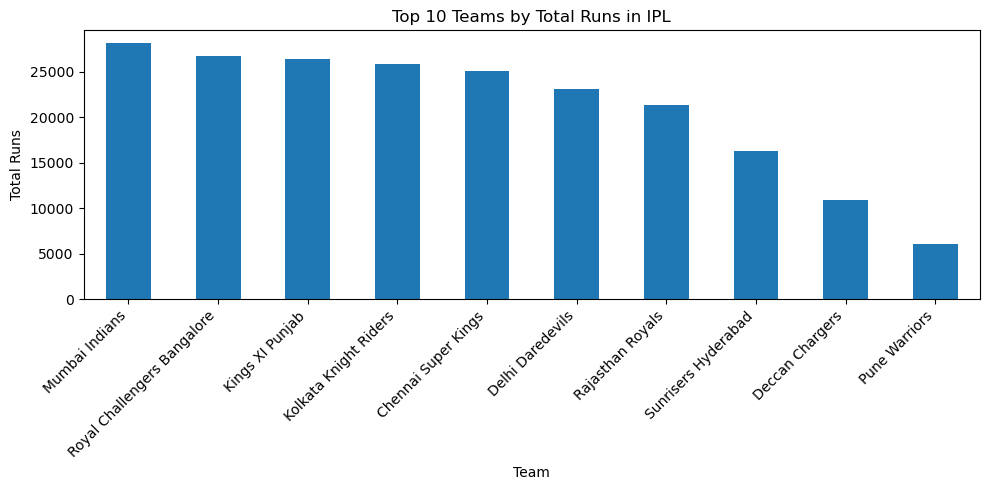

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
top_teams_runs.head(10).plot(kind='bar')
plt.title("Top 10 Teams by Total Runs in IPL")
plt.xlabel("Team")
plt.ylabel("Total Runs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()